# ZOMATO API - II Solutions

##### Q3.) Visualization

##### 3.1.) Plot the bar graph of top 15 restaurants which have the maximum number of outlets.

,Restaurant Name,Number of outlets
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
5,Keventers,34
6,Giani,29
7,Pizza Hut,29
8,Baskin Robbins,28
9,Barbeque Nation,25


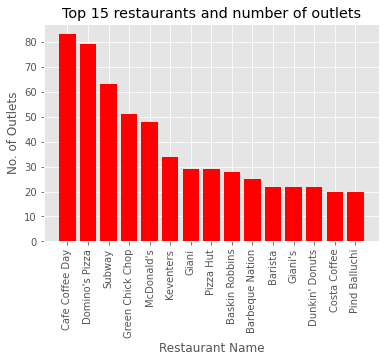

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

restaurants = list(data["Restaurant Name"].value_counts().index)[:15]
count  = list(data["Restaurant Name"].value_counts())[:15]

df = pd.DataFrame(list(zip(restaurants, count)), 
               columns =['Restaurant Name', 'Number of outlets']) 

display(df)


plt.style.use("ggplot")
plt.bar(restaurants,count , color = 'red')
plt.xlabel('Restaurant Name')
plt.ylabel('No. of Outlets')
plt.title('Top 15 restaurants and number of outlets')
plt.xticks(rotation = 90)
plt.show()

##### 3.2.)

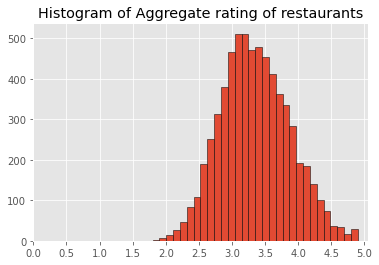

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data = data[data['Rating text'] != 'Not rated']
data["Aggregate rating"].dropna(inplace = True)
ratings = list(data["Aggregate rating"])
xaxis = np.arange(0,5.5,0.5)

# Making the histogram
plt.hist(ratings , bins = 30 , edgecolor = "black")
plt.xticks(xaxis)
plt.title("Histogram of Aggregate rating of restaurants")
plt.show()

##### 3.3.)

,Restaurant Name,Address,Votes
0,Toit,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",10934
1,Truffles,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",9667
2,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",7931
3,Peter Cat,"18A, Park Street, Park Street Area, Kolkata",7574
4,AB's - Absolute Barbecues,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",6907
5,Barbeque Nation,"K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...",5966
6,Big Brewsky,"Behind MK Retail, Before WIPRO Corporate Offic...",5705
7,AB's - Absolute Barbecues,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...",5434
8,The Black Pearl,"105, 1st A Cross Road, Jyothi Nivas College Ro...",5385
9,BarBQ,"43-47-55, Park Street Area, Kolkata",5288


Text(0.5, 1.0, 'Top 10 Unique Restaurants vs Votes')

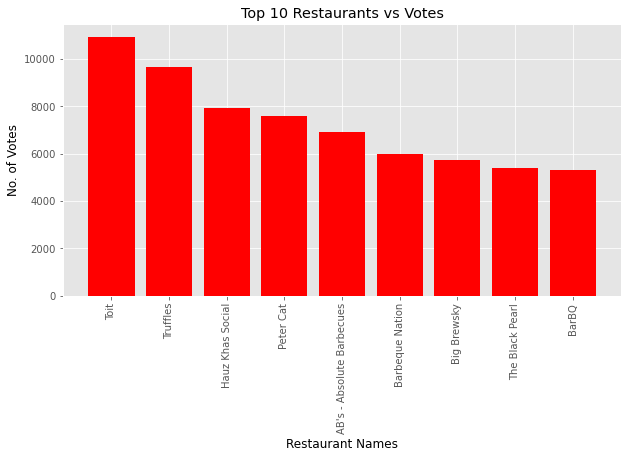

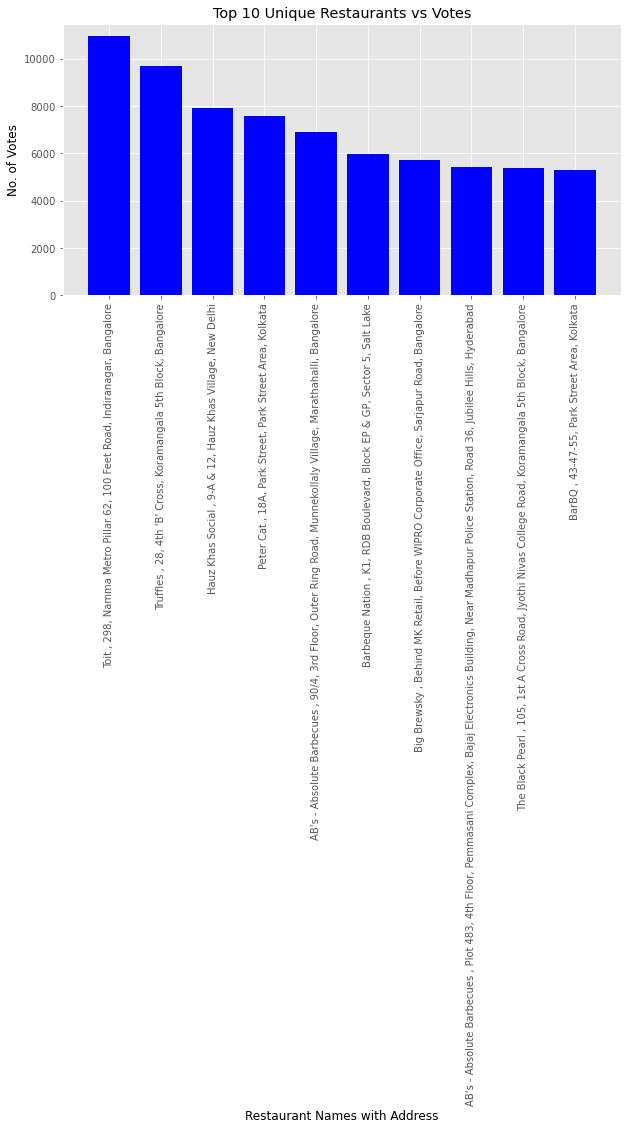

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]


data.sort_values("Votes" , ascending = False,inplace = True)

data["Res_with_Address"] = data["Restaurant Name"]+" , "+data["Address"]


# LISTS OF TOP-10 RESTAURANTS & THEIR VOTES
RestaurantNames = [i.split(" , ")[0] for i in list(data["Res_with_Address"])][:10]
RestaurantNames_with_Address = list(data["Res_with_Address"])[:10]
Address = [i.split(" , ")[1] for i in list(data["Res_with_Address"])][:10]
RestaurantVotes = list(data["Votes"])[:10]

# Printing the top 10 restaurants , address and their votes.
Top10 = pd.DataFrame(list(zip(RestaurantNames,Address,RestaurantVotes)) , columns = ['Restaurant Name', 'Address', 'Votes'])
display(Top10)

# Graph for Restaurant names vs votes 
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(RestaurantNames,RestaurantVotes , color= 'r')
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Names" , c='k')
plt.ylabel("No. of Votes" , c='k')
plt.title("Top 10 Restaurants vs Votes")

# Graph for Restaurant names with Address vs votes
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(RestaurantNames_with_Address,RestaurantVotes , color= 'b')
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Names with Address" , c='k')
plt.ylabel("No. of Votes" , c='k')
plt.title("Top 10 Unique Restaurants vs Votes")



##### 3.4.)

,Cuisine,Count
0,American,112
1,Seafood,59
2,Burger,49
3,Sandwich,49
4,Pizza,49
5,Steak,42
6,Italian,38
7,Breakfast,37
8,Mexican,36
9,Sushi,34


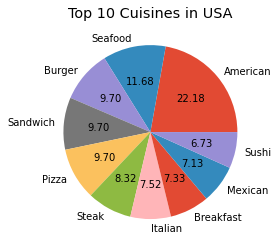

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 216]

data['Cuisines'].dropna(inplace = True)

cuisine_count = {}

def get_count(cuisines):
    cuisines = str(cuisines)
    if cuisines!="":
        for cuisine in cuisines.split(', '):
            cuisine_count[cuisine] = cuisine_count.get(cuisine,0)+1
    return cuisines

data['Cuisines'].apply(get_count)

cuisine_count = sorted(cuisine_count.items(), key=lambda x: x[1] , reverse = True)

top10cuisines = [i[0] for i in cuisine_count[:10]]
top10cuisines_count = [i[1] for i in cuisine_count[:10]]

# Diplaying the top 10 cuisines in USA
Top10 = pd.DataFrame(list(zip(top10cuisines,top10cuisines_count)) , columns = ['Cuisine', 'Count'])
display(Top10)


# Making the pie chart
plt.pie(top10cuisines_count , labels = top10cuisines , autopct = "%.2f")
plt.title("Top 10 Cuisines in USA")
plt.show()


##### 3.5.)Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

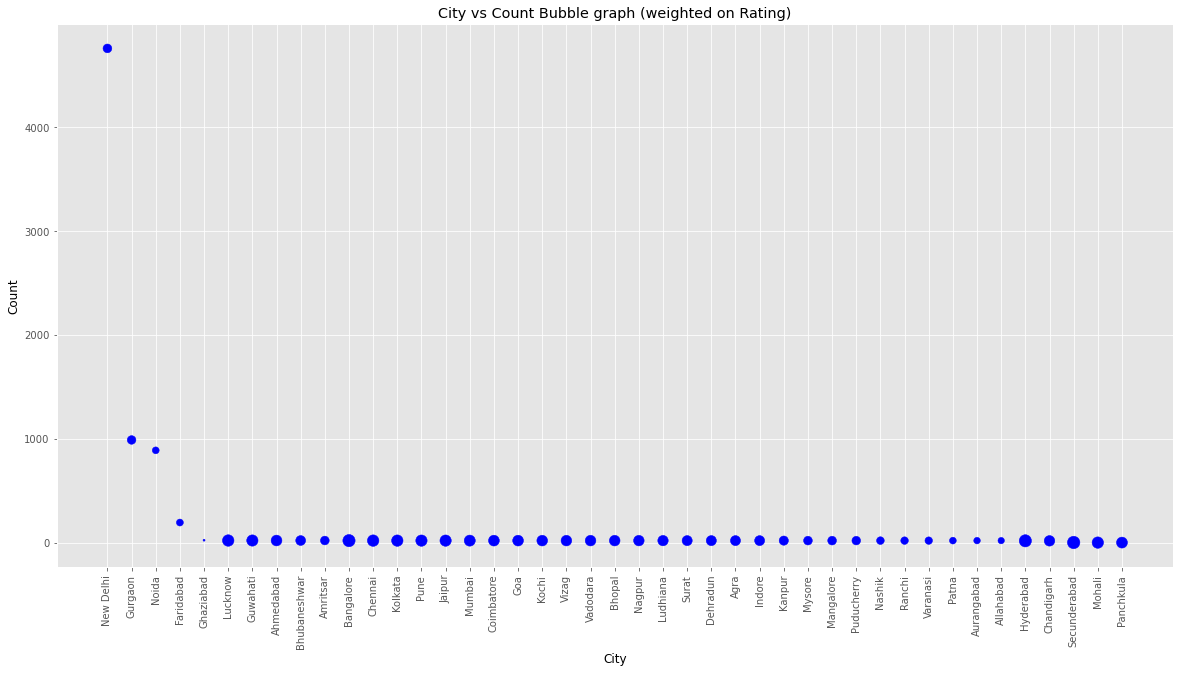

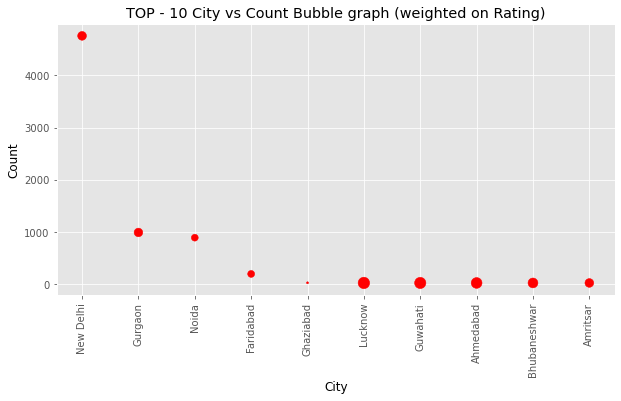

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

city_dict = {}

cities = np.array(data["City"])
ratings = np.array(data["Aggregate rating"])
votes = np.array(data["Votes"])

for i in range(len(cities)) :
    if votes[i] != 0 :
        if cities[i] not in city_dict :
            city_dict[cities[i]] = [votes[i] * ratings[i] , votes[i] , 1]
        else:
            city_dict[cities[i]][0] += votes[i]*ratings[i]
            city_dict[cities[i]][1] += votes[i]
            city_dict[cities[i]][2] +=1 
            
city_and_rating = []
for key,value in city_dict.items():
    city = key
    weighted_rating = round(value[0]/value[1],2)
    city_and_rating.append([value[2],weighted_rating,key])
    
city_and_rating.sort(reverse = True)

CITIES = np.array([i[2] for i in city_and_rating])
RATING = np.array([i[1] for i in city_and_rating])
RATING = RATING-3
COUNT = np.array([i[0] for i in city_and_rating])

# Showing all the cities 
plt.figure(figsize=(20,10))
plt.scatter(CITIES , COUNT , s = RATING*100 , color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('City' , color = 'k')
plt.ylabel('Count' , color = 'k')
plt.title('City vs Count Bubble graph (weighted on Rating)')
plt.show()

# Showing for only the top 10 cities based on count
TOP10_CITIES = CITIES[:10]
TOP10_RATING = RATING[:10]
TOP10_COUNT = COUNT[:10]

plt.figure(figsize=(10,5))
plt.scatter(TOP10_CITIES , TOP10_COUNT , s = TOP10_RATING*100 , color = 'r')
plt.xticks(rotation = 90)
plt.xlabel('City' , color = 'k')
plt.ylabel('Count' , color = 'k')
plt.title('TOP - 10 City vs Count Bubble graph (weighted on Rating)')
plt.show()
